# Class Project

##Codebook
After a review of the various code books available for the class, I decided to use the Gapminder data set.

##Question
Is there an association between Internet usage and suicide rates?  I will use the variables Internetuserate and suicideper100TH rate in my code book.  

##Literature Review
There is concern that the Internet is playing an increasing role in self-harm and suicide. Internet use may exert both positive and negative effects on young people at risk of self-harm or suicide. The internet has created channels of communication that can be misused to 'cyber-bully' peers; both cyber-bullying and general internet use have been found to correlate with increased risk of self-harm, suicidal idealization, and depression.  Youth who self-harm or are suicidal often make use of the internet. It is most commonly used for constructive reasons such as seeking support and coping strategies, but may exert a negative influence, normalizing self-harm and potentially discouraging disclosure or professional help-seeking. Correlations have been found between internet exposure and violent methods of self-harm.

Baker D, & Fortune S (2008) Understanding self-harm and suicide websites a qualitative interview study of young adult website users. Crisis 29: 118-122.

Daine K, Hawton K, Singaravelu V, Stewart A, Simkin S, Montgomery P (2013) The Power of the Web: A Systematic Review of Studies of the Influence of the Internet on Self-Harm and Suicide in Young People. PLoS ONE 8(10): e77555. doi:10.1371/journal.pone.0077555

Dunlop SM, More E, Romer D (2011) Where do youth learn about suicides on the Internet, and what influence does this have on suicidal ideation? J Child Psychol Psychiatry 52: 1073-1080.

Durkee T, Hadlaczky G, Westerlund M, Carli V (2011) Internet pathways in suicidality: A review of the evidence. IntJEnvironResPublic Health 8: 3938- 3952.

Gould MS, Wallenstein S, Kleinman MH, O'Carroll P, Mercy J (1990) Suicide clusters: an examination of age-specific effects. Am J Public Health 80: 211-212.

Hawton K, Saunders KEA, O'Connor RC (2012) Self-harm and suicide in adolescents. Lancet 379: 2373-2382.

Kim K, Ryu E, Chon MY, Yeun EJ, Choi SY, et al. (2006) Internet addiction in Korean adolescents and its relation to depression and suicidal ideation: A questionnaire survey. Int J Nurs Stud 43: 185-192.

Katsumata Y, Matsumoto T, Kitani M, Takeshima T (2008) Electronic media use and suicidal ideation in Japanese adolescents. Psychiatry Clin Neurosci 62: 744-746.

Madge N, Hawton K, McMahon EM, De Leo D, de Wilde EJ, et al. (2011) Psychological characteristics, stressful life events and deliberate self-harm: findings from the Child & Adolescent Self-harm in Europe (CASE) Study. Eur Child Adolesc Psychiatry 20: 499-508.

O'Connor RC, Rasmussen S, Hawton K (2012) Distinguishing adolescents who think about self-harm from those who engage in self-harm. Br J Psychiatry 200: 330-335.

Patton GC, Coffey C, Sawyer SM, Viner RM, Haller DM, et al. (2009) Global patterns of mortality in young people: a systematic analysis of population health data. Lancet 374: 881-892.

##Hypothesis
There is a positive relationship between Internet usage rates and suicide rates.

##Data
Before beginning any analysis, I needed to import some python libraries.

In [60]:
import graphlab as gl
import numpy as np
print "numpy version: ", np.__version__
import sys
print sys.version
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import graphlab.numpy
import seaborn
import scipy

gl.canvas.set_target('ipynb') # Print graphlab graphs in line
%matplotlib inline

numpy version:  1.9.2
2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]


I downloaded the data in a CSV file (gapminder.csv) from the course website and saved it to D:/Data/CourseraClass directory on my machine.  I loaded the data in Python from the CSV file. 

In [61]:
data = pd.read_csv('D:/Data/CourseraClass/gapminder.csv')
len(data)

213

## Exploratory Analysis
Review the top of the data.

In [62]:
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


Review the bottom of the data.

In [63]:
data.tail()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
208,Vietnam,722.807558834445,3.91,1.0853671,16.2,1425435000,67.5999984741211,.4,27.8518215557703,75.181,,-7,302.725654656034,11.6533222198486,71,27.84
209,West Bank and Gaza,,,5.9360854,,14241333.3333333,11.3000001907349,,36.4227717919075,72.832,,,,,32,71.9
210,"Yemen, Rep.",610.3573673206,.2,2.3162346,35.1,234864666.666667,20.2999992370605,,12.3497504635596,65.493,,-2,130.05783139719,6.26578903198242,39,30.64
211,Zambia,432.226336974583,3.56,.3413352,13,132025666.666667,53.5,13.5,10.124986462443,49.025,,7,168.623030511023,12.0190362930298,61,35.42
212,Zimbabwe,320.771889948584,4.96,1.0327854,19,590219666.666666,58.0999984741211,14.3,11.5004153209768,51.384,,1,297.883200408304,13.9052667617798,66.8000030517578,37.34


Subset the data to remove missing values from the variables of interest.

In [64]:
data['suicideper100th'].replace('', np.nan)
data['internetuserate'].replace('', np.nan)
sub1 = data[['suicideper100th', 'internetuserate']].dropna()
len(sub1)

213

Convert the two fields to numeric

In [65]:
sub1['suicideper100th'] = sub1['suicideper100th'].convert_objects(convert_numeric=True)
sub1['internetuserate'] = sub1['internetuserate'].convert_objects(convert_numeric=True)

Create categorial predictor based on percentiles.  Those in the lowest 25th percentile will be coded 1 to indicate low usage. Those in the upper 75th percentile will be coded as 3 to indicate high usage.  Those in between will be coded as 2 to indicate medium usage.

In [66]:
print (round(np.percentile(sub1['internetuserate'],25)))
print (round(np.percentile(sub1['internetuserate'],50)))
print (round(np.percentile(sub1['internetuserate'],75)))

12.0
37.0
70.0


In [67]:
sub1['internetrate'] = 0
sub1['internetrate'][(sub1['internetuserate']>=70)] = 3
sub1['internetrate'][(sub1['internetuserate']<=12)] = 1
sub1['internetrate'][(sub1['internetuserate']>=12) & (sub1['internetuserate']<=70)] = 2

C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

Create categorial response based on percentiles. Those in the lower 50 percentile will be coded 1 to indicate low rate. Those in the upper 50 percentile will be coded as 2 to indicate high rate.

In [68]:
print (round(np.percentile(sub1['suicideper100th'],25)))
print (round(np.percentile(sub1['suicideper100th'],50)))
print (round(np.percentile(sub1['suicideper100th'],75)))

6.0
10.0
15.0


In [69]:
sub1['suiciderate'] = 0
sub1['suiciderate'][(sub1['suicideper100th']>=10)] = 2
sub1['suiciderate'][(sub1['suicideper100th']< 10)] = 1
#sub1['suiciderate'][(sub1['suicideper100th']>=6) & (sub1['internetuserate']<=15)] = 2
sub2 = sub1[(sub1['internetrate'] > 0) & (sub1['suiciderate']  > 0)]
len(sub2)

C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


177

##Numerical Summaries

Compute mean and standard deviation for Internet Usage Rate

In [70]:
print (round(sub2['internetuserate'].mean(),2))
print (round(sub2['internetuserate'].std(),2))

33.73
27.55


Compute mean and standard deviation for Suicide Rate

In [71]:
print (round(sub2['suicideper100th'].mean(),2))
print (round(sub2['suicideper100th'].std(),2))

9.65
6.29


Convert new column to numeric

In [72]:
#del sub2['internetuserate']
sub2['internetrate']= sub2['internetrate'].convert_objects(convert_numeric=True)
sub2.head()

C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,suicideper100th,internetuserate,internetrate,suiciderate
0,6.684385,3.654122,1,1
1,7.699330,44.989947,2,1
2,4.848770,12.500073,2,1
3,5.362179,81.000000,3,1
4,14.554677,9.999954,1,2


##Model
Using ols function for calculating the F-statistic and associated p value

In [73]:
model1=smf.ols(formula='suicideper100th ~ C(internetrate)', data=sub2)
results1 = model1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9536
Date:                Wed, 04 Nov 2015   Prob (F-statistic):              0.387
Time:                        18:58:47   Log-Likelihood:                -575.06
No. Observations:                 177   AIC:                             1156.
Df Residuals:                     174   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                9.9659 

###Model Interpretation for ANOVA:

When examining the association between suicide rate (quantitative response) and internet usage rate, an Analysis of Variance (ANOVA) revealed that suicide rate (Mean=9.6, s.d. ±6.3) was not related to Internet Usage Rate (Mean=35.6, s.d. ±27.8), F(1, 174)=.6317, p>.05.

Compute group means & group standard deviations

In [74]:
sub3 = sub2[['suicideper100th', 'internetrate']]
print ('Means for Suicide Rates by Internet Use')
m2= sub3.groupby('internetrate').mean()
print (m2)

Means for Suicide Rates by Internet Use
              suicideper100th
internetrate                 
1                    9.965920
2                    9.103418
3                   10.872157


In [75]:
print ('Standard deviations for Suicide Rates by Internet Use')
sd2 = sub3.groupby('internetrate').std()
print (sd2)

Standard deviations for Suicide Rates by Internet Use
              suicideper100th
internetrate                 
1                    5.211217
2                    7.057926
3                    5.372096


###Post Hoc Analysis
Although significant results were not established, a post hoc analysis was conducted to demonstrate ability to run post hoc analysis.

In [76]:
mc1 = multi.MultiComparison(sub2['suicideper100th'], sub2['internetrate'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.8625  -3.3859 1.6609 False 
  1      3     0.9062  -2.5445 4.357  False 
  2      3     1.7687  -1.4314 4.9689 False 
--------------------------------------------


###Scatter Plot

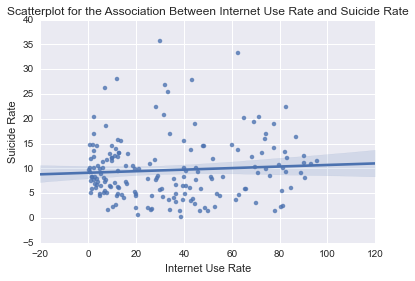

In [77]:
scat1 = seaborn.regplot(x="internetuserate", y="suicideper100th", fit_reg=True, data=sub2)
plt.xlabel('Internet Use Rate')
plt.ylabel('Suicide Rate')
plt.title('Scatterplot for the Association Between Internet Use Rate and Suicide Rate')

###Correlation

In [89]:
print ('Association between Internet Use Rate and Suicide Rate')
r = scipy.stats.pearsonr(sub2['internetuserate'], sub2['suicideper100th'])
print r

Association between Internet Use Rate and Suicide Rate
(0.068718882674353166, 0.36343322313256021)


In [91]:
r_squared = r[0] * r[0]
print('R Squared = '+str(r_squared))

R Squared = 0.00472228483601


Pearson R ws .06 indicating a weak association.  The result was not statistically significant.  R-squared indicated less that 1% of the variation in suicide rates was explained by internet usage rates.

##Chi-square

In [80]:
# contingency table of observed counts
ct1=pd.crosstab(sub2['internetrate'], sub2['suiciderate'])
print (ct1)

suiciderate    1   2
internetrate        
1             31  24
2             62  32
3             12  16


In [81]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

suiciderate          1         2
internetrate                    
1             0.295238  0.333333
2             0.590476  0.444444
3             0.114286  0.222222


In [82]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(5.0601550020394983, 0.079652846869819716, 2L, array([[ 32.62711864,  22.37288136],
       [ 55.76271186,  38.23728814],
       [ 16.61016949,  11.38983051]]))


###Model Interpretation for Chi-square:

When examining the association between suicide rate (coded as high or low) and internet usage rate (coded as high, medium or low) , a Chi Square test concluded that suicide rate was not related to Internet Usage Rate, p > .05.

### Bar Plot of Results

In [83]:
# set rate to category variable type
sub2["internetrate"] = sub2["internetrate"].astype('category')

C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


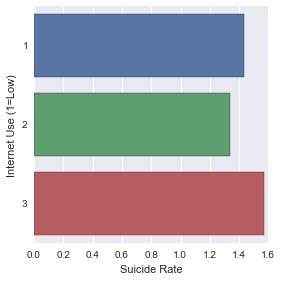

In [84]:
# graph percent with nicotine dependence within each smoking frequency group 
seaborn.factorplot(x="suiciderate", y="internetrate", data=sub2, kind="bar", ci=None)
plt.xlabel('Suicide Rate ')
plt.ylabel('Internet Use (1=Low)')

###Post Hoc Analysis
Although significant results were not established, a post hoc analysis was conducted to demonstrate ability to run post hoc analysis.

In [85]:
recode2 = {1: 1, 2: 2}
sub2["COMP1v2"] = sub2["internetrate"].map(recode2)

# contingency table of observed counts
ct2=pd.crosstab(sub2['COMP1v2'], sub2['suiciderate'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

suiciderate   1   2
COMP1v2            
1            31  24
2            62  32
suiciderate         1         2
COMP1v2                        
1            0.333333  0.428571
2            0.666667  0.571429
chi-square value, p value, expected counts
(0.9831502809990289, 0.3214222881635399, 1L, array([[ 34.32885906,  20.67114094],
       [ 58.67114094,  35.32885906]]))


C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [86]:
recode3 = {1: 1, 3: 3}
sub2["COMP1v3"] = sub2["internetrate"].map(recode3)

# contingency table of observed counts
ct3=pd.crosstab(sub2['COMP1v3'], sub2['suiciderate'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

suiciderate   1   2
COMP1v3            
1            31  24
3            12  16
suiciderate        1    2
COMP1v3                  
1            0.72093  0.6
3            0.27907  0.4
chi-square value, p value, expected counts
(0.8686751547870728, 0.35132234304971044, 1L, array([[ 28.4939759,  26.5060241],
       [ 14.5060241,  13.4939759]]))


C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [87]:
recode4 = {2: 2, 3: 3}
sub2["COMP2v3"] = sub2["internetrate"].map(recode4)

# contingency table of observed counts
ct4=pd.crosstab(sub2['COMP2v3'], sub2['suiciderate'])
print (ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

suiciderate   1   2
COMP2v3            
2            62  32
3            12  16
suiciderate         1         2
COMP2v3                        
2            0.837838  0.666667
3            0.162162  0.333333
chi-square value, p value, expected counts
(3.9045918306224165, 0.048154323521196939, 1L, array([[ 57.01639344,  36.98360656],
       [ 16.98360656,  11.01639344]]))


C:\Users\bryan_000\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
